# Importing all required Libraries

In [1]:
# importing all required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\mouni\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

# Data Cleaning

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace = True)

In [9]:
# removing outliers in bmi column by using IQR Method
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower_bound = Q1 - 1.5*IQR
bmi_upper_bound = Q3 + 1.5*IQR
df = df[(df['bmi'] > bmi_lower_bound)&(df['bmi']<bmi_upper_bound)]
print(df.shape)

(1328, 7)


# Data Exploration

In [8]:
df.shape

(1328, 7)

In [71]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [72]:
len(df.columns)

7

In [73]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337],
           dtype='int64', length=1328)

In [74]:
df.count()

age         1328
sex         1328
bmi         1328
children    1328
smoker      1328
region      1328
charges     1328
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   object 
 2   bmi       1328 non-null   float64
 3   children  1328 non-null   int64  
 4   smoker    1328 non-null   object 
 5   region    1328 non-null   object 
 6   charges   1328 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.0+ KB


In [76]:
df.describe()

,age,bmi,children,charges
count,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,30.537308,1.097139,13221.047810
std,14.042170,5.922176,1.208008,11997.547468
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4744.325050
50%,39.000000,30.300000,1.000000,9369.615750
75%,51.000000,34.488750,2.000000,16604.302645
max,64.000000,46.750000,5.000000,62592.873090


In [77]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1328.0,39.219127,14.042170,18.0000,27.00000,39.00000,51.000000,64.00000
bmi,1328.0,30.537308,5.922176,15.9600,26.22000,30.30000,34.488750,46.75000
children,1328.0,1.097139,1.208008,0.0000,0.00000,1.00000,2.000000,5.00000
charges,1328.0,13221.047810,11997.547468,1121.8739,4744.32505,9369.61575,16604.302645,62592.87309


In [79]:
df['sex'].value_counts()

male      669
female    659
Name: sex, dtype: int64

In [80]:
df['sex'].value_counts().count()

2

In [81]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [82]:
df['sex'].nunique()

2

In [83]:
df['children'].value_counts()

0    570
1    320
2    238
3    157
4     25
5     18
Name: children, dtype: int64

In [84]:
df['children'].value_counts().count()

6

In [85]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [86]:
df['children'].nunique()

6

In [87]:
df['smoker'].value_counts()

no     1057
yes     271
Name: smoker, dtype: int64

In [88]:
df['smoker'].value_counts().count()

2

In [89]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [90]:
df['smoker'].nunique()

2

In [91]:
df['region'].value_counts()

southeast    357
southwest    324
northwest    324
northeast    323
Name: region, dtype: int64

In [92]:
df['region'].value_counts().count()

4

In [93]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [94]:
df['region'].nunique()

4

In [95]:
df['age'].min()

18

In [96]:
df['age'].max()

64

In [97]:
df['charges'].min()

1121.8739

In [98]:
df['charges'].max()

62592.87309

In [99]:
df['bmi'].min()

15.96

In [100]:
df['bmi'].max()

46.75

In [101]:
df.select_dtypes(include = 'number')

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [102]:
df.select_dtypes(exclude = 'number')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [103]:
pd.crosstab(df['sex'], df['smoker'])

smoker,no,yes
sex,,
female,546,113
male,511,158


In [104]:
pd.crosstab(df['sex'], df['region'])

region,northeast,northwest,southeast,southwest
sex,,,,
female,160,164,174,161
male,163,160,183,163


In [105]:
pd.crosstab(df['smoker'], df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,256,266,268,267
yes,67,58,89,57


# Data Visualization

# Using Matplotlib and Seaborn Libraries:

# Uni-Variate Data Analysis:

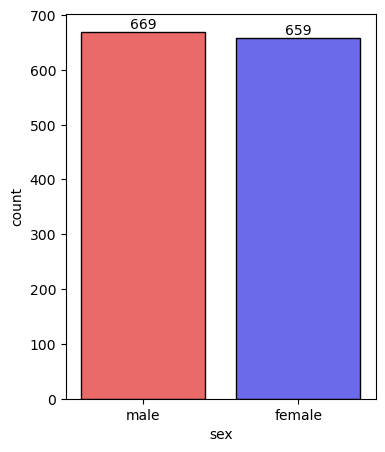

In [106]:
plt.figure(figsize = (4,5))
a = sns.countplot(x = 'sex', data = df, palette = 'seismic_r', edgecolor = 'k', order = ['male', 'female'])
for i in a.containers:
    a.bar_label(i)
plt.show();

# Observation:

- Males are more in number as compared to Females.

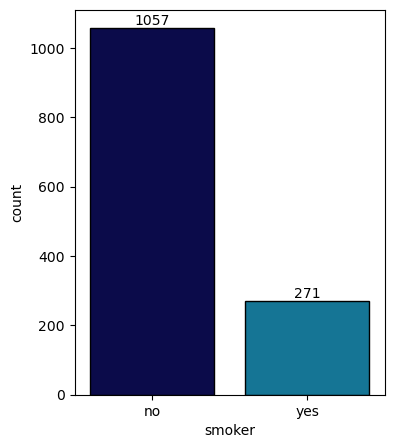

In [107]:
plt.figure(figsize = (4,5))
a = sns.countplot(x = 'smoker', data = df, palette = 'ocean', edgecolor = 'k', order = ['no', 'yes'])
for i in a.containers:
    a.bar_label(i)
plt.show();

# Observation:

- Non-Smokers are more in number as compared to Smokers.

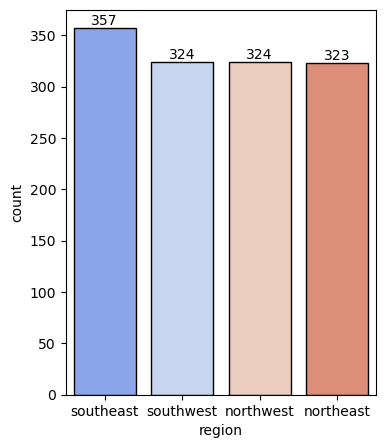

In [108]:
plt.figure(figsize = (4,5))
a = sns.countplot(x = 'region', data = df, palette = 'coolwarm', edgecolor = 'k', order = ['southeast', 'southwest', 'northwest', 'northeast'])
for i in a.containers:
    a.bar_label(i)
plt.show();

# Observations:

- southeast region People are more in number as compared to all other regions.
- northwest and northeast region People are same in number.

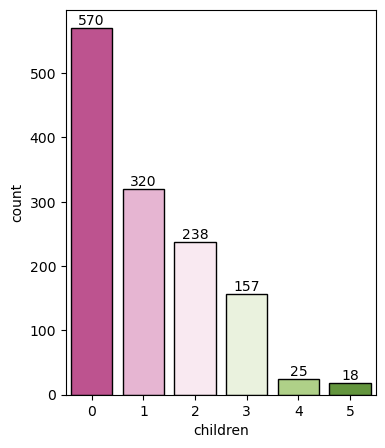

In [109]:
plt.figure(figsize = (4,5))
a = sns.countplot(x = 'children', data = df, palette = 'PiYG', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i)
plt.show();

# Observations:

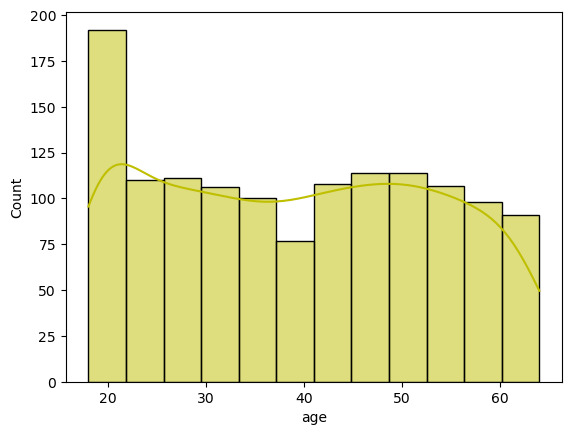

In [110]:
sns.histplot(x = 'age', data = df, color = 'y', edgecolor = 'k', kde = True)
plt.show();

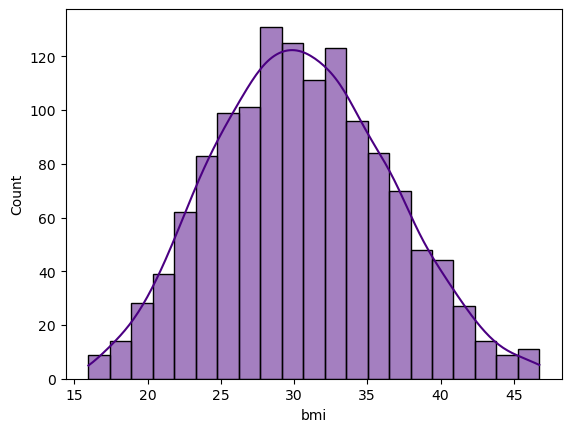

In [111]:
sns.histplot(x = 'bmi', data = df, color = 'indigo', edgecolor = 'k', kde = True)
plt.show();

# Observation:

- Approximately, bmi column follows Normal Distribution.

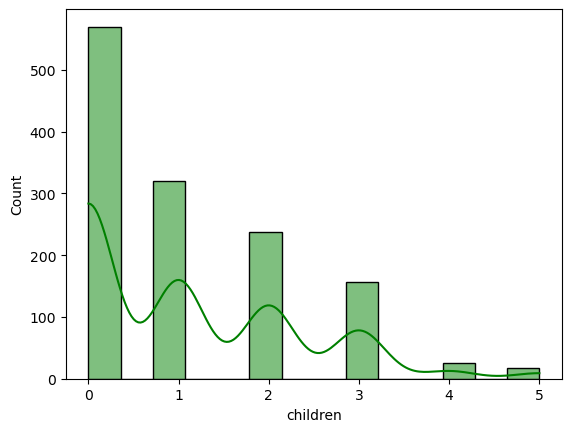

In [112]:
sns.histplot(x = 'children', data = df, color = 'green', edgecolor = 'k', kde = True)
plt.show();

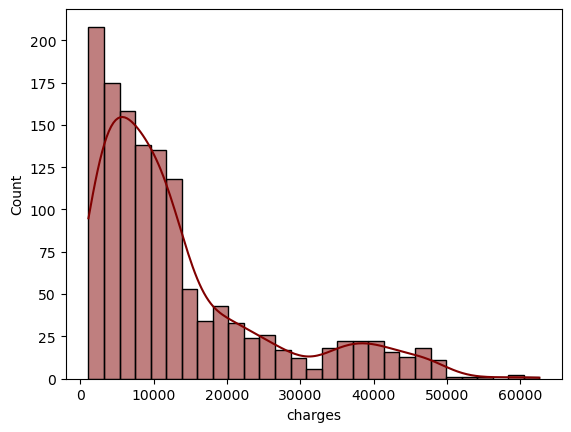

In [113]:
sns.histplot(x = 'charges', data = df, color = 'maroon', edgecolor = 'k', kde = True)
plt.show();

# Observation:

- Charges column data distribution is Right Skewed (i.e, Positive Skewness).

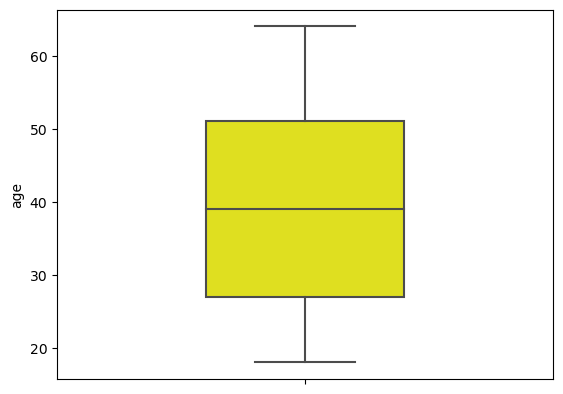

In [114]:
sns.boxplot(y = 'age', data = df, width = 0.4, color = 'yellow')
plt.show();

# Observation:

- 25% to 75% of the age of the people is in between 27 and 51 years.
- Minimum age of People is 18 years.
- Maximum age of People is 64 years.
- Here, we can see that there is no Outliers in age column.

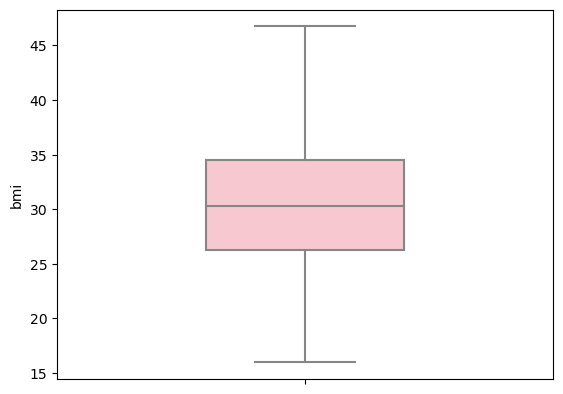

In [115]:
sns.boxplot(y = 'bmi', data = df, width = 0.4, color = 'pink')
plt.show();

# Observations:

- Minimum bmi of People is 15.
- Maximum bmi of People is nearly 53.
- 25% to 50% of bmi of People is in between 26 and 34.
- bmi column has Outliers.

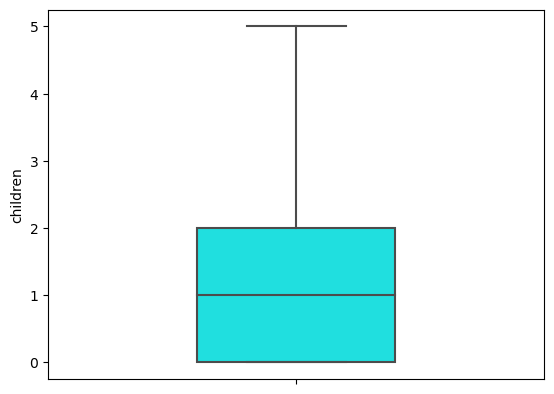

In [116]:
sns.boxplot(y = 'children', data = df, width = 0.4, color = 'cyan')
plt.show();

# Observations:

- 50% of the People having 1 Child.
- 25% of the People having 2 children.

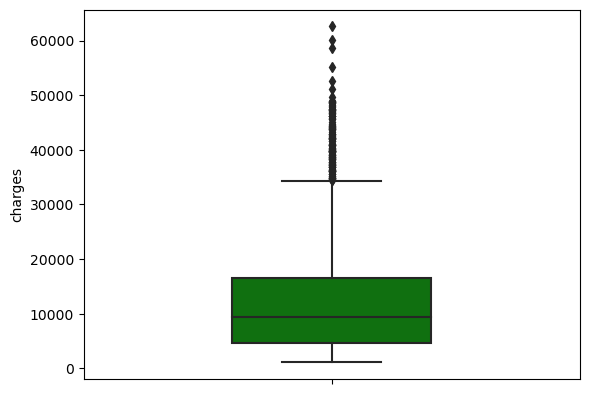

In [117]:
sns.boxplot(y = 'charges', data = df, width = 0.4, color = 'green')
plt.show();

# Observations:

- 25% to 70% of the Charges approximately is in between 4500 and 16500.
- Many Outliers are Exist in Charges Column.

# Bi-Variate Data Analysis:

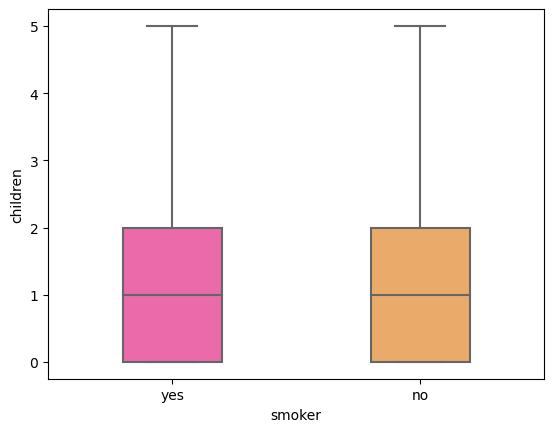

In [118]:
sns.boxplot(y = 'children', x = 'smoker', data = df, width = 0.4, palette = 'spring' )
plt.show();

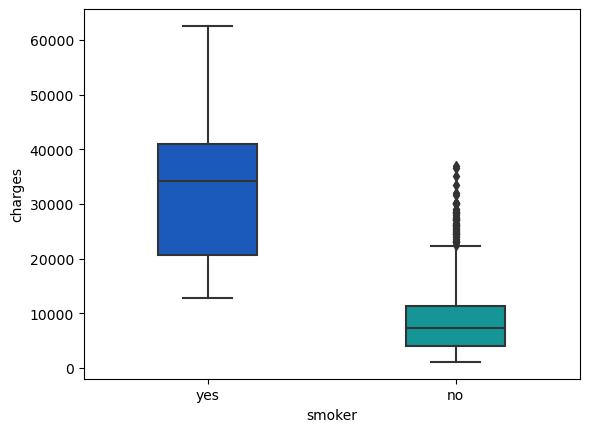

In [119]:
sns.boxplot(y = 'charges', x = 'smoker', data = df, width = 0.4, palette ='winter')
plt.show();

# Observations:

- Smokers Paid High Charges as compared to Non-Smokers.
- Some of Non-Smokers also paid high Charges.
- Nearly, 80% of Non-Smokers Paid Low Charges.

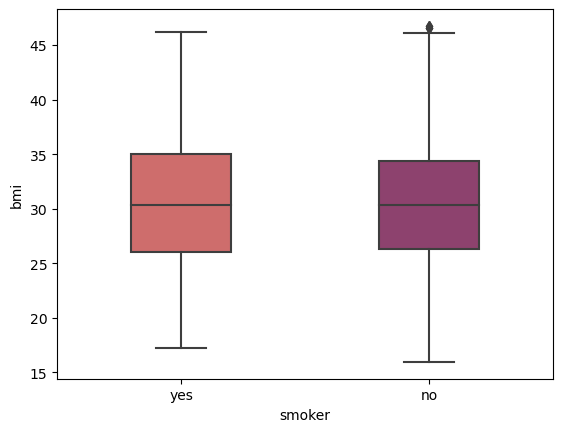

In [120]:
sns.boxplot(y = 'bmi', x = 'smoker', data = df, width = 0.4, palette = 'flare')
plt.show();

# Observation:

- Non-Smokers have good Body Mass Index as compared to Smokers bmi.

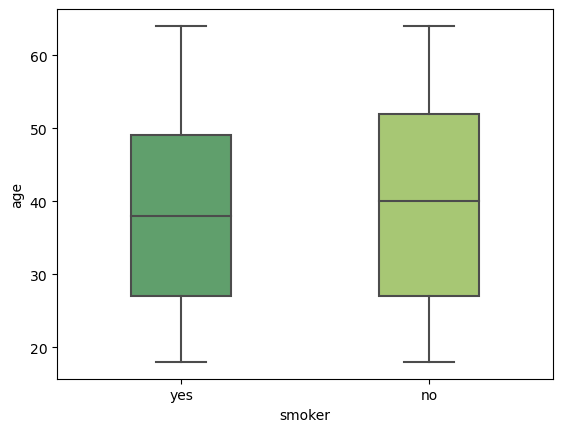

In [121]:
sns.boxplot(y = 'age', x = 'smoker', data = df, width = 0.4, palette = 'summer')
plt.show();

# Observations:

- 25% to 75% of Smokers age is in between 27 and 49 years.
- 25% to 75% of Non-Smokers age is in between 27 and 51 years.

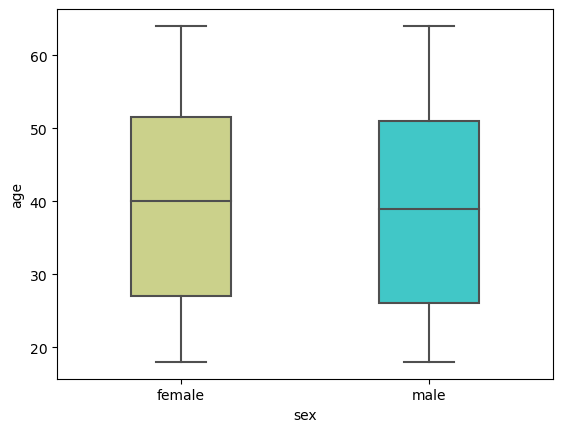

In [122]:
sns.boxplot(y = 'age', x = 'sex', data = df, width = 0.4, palette = 'rainbow_r')
plt.show();

# Observations:

- Approximately, 25% to 75% of Females age is in between 28 and 51.
- Approximately, 25% to 75% of Males age is in between 27 and 50.

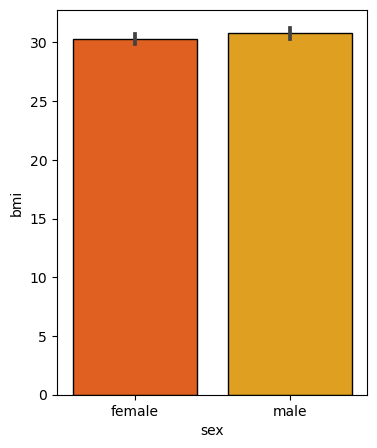

In [123]:
plt.figure(figsize = (4,5))
sns.barplot(y = 'bmi', x = 'sex', data = df, palette = 'autumn', edgecolor = 'k')
plt.show();

# Observation:

- Somehow, Males have high bmi as compared to Females.

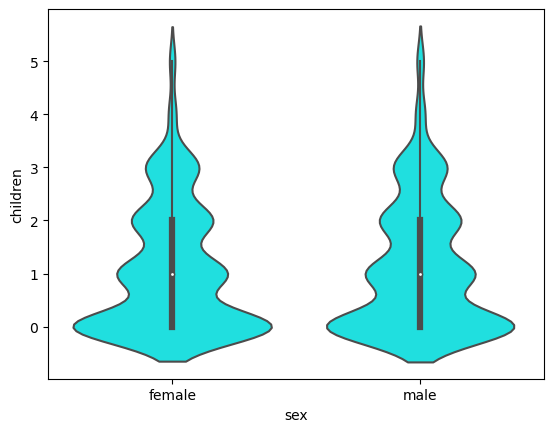

In [124]:
sns.violinplot(y = 'children', x = 'sex', data = df, color = 'cyan')
plt.show();

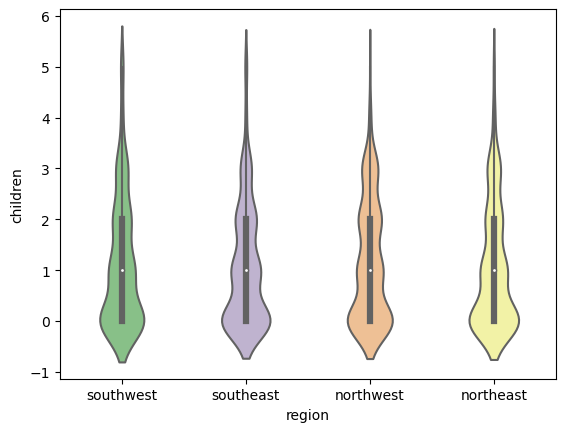

In [125]:
sns.violinplot(y = 'children', x = 'region', data = df, width = 0.4, palette = 'Accent')
plt.show();

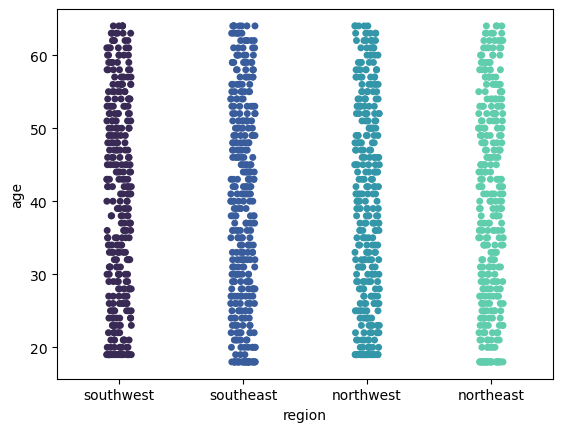

In [126]:
sns.stripplot(y = 'age', x = 'region', data = df, palette = 'mako')
plt.show();

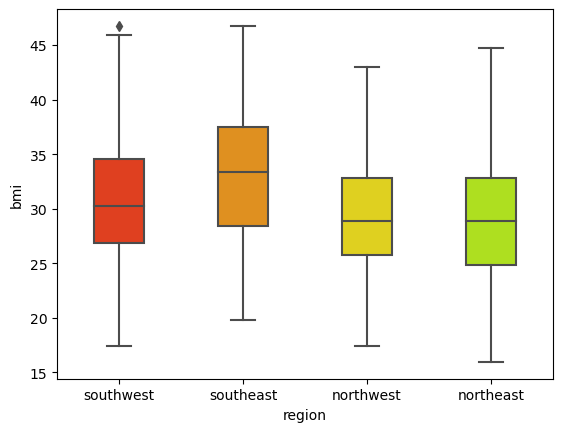

In [127]:
sns.boxplot(y = 'bmi', x = 'region', data = df, width = 0.4, palette = 'prism')
plt.show;

# Observation:

- More southeast region People having Overweight and Obesity because bmi range is in between nearly 29 and 38 as compared to other regions.

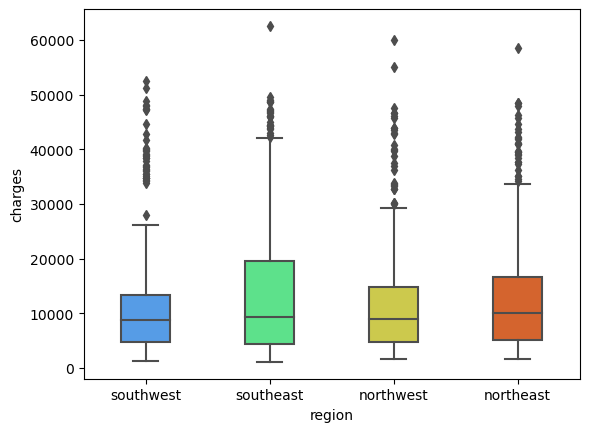

In [128]:
sns.boxplot(y = 'charges', x = 'region', data = df, width = 0.4, palette = 'turbo')
plt.show();

# Observation:

- southeast region People paid more high charges because of Overweight and Obesity.

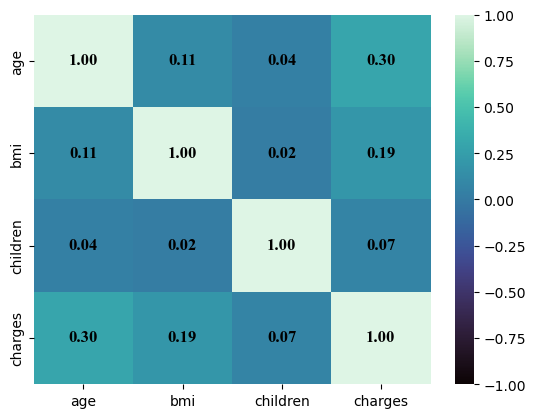

In [129]:
sns.heatmap(df.corr(), cmap = 'mako',center = 0, vmin = -1, vmax = 1, annot = True,
                                                                    fmt = ".2f", annot_kws = {
                                                                    'fontsize':12,
                                                                    'fontweight':'bold',
                                                                    'fontfamily':'Times new roman',
                                                                    'color':'k'
                                                                     });

# Observations:

- 30% of Strength exists between age and charges.
- 20% of Strength exists between bmi and charges.
- And other variables impacted very less on charges variable.